# R for Drug Development

## OpenFDA API
![](https://www.fda.gov/media/85643/download)

https://www.rdocumentation.org/packages/openfda/versions/1.7.0.9000

https://github.com/rOpenHealth/openfda

https://github.com/FDA/openfda



A ggplot2 template - Make any plot by filling in the parameters of this template

ggplot(data = ) + (mapping = aes())

ggplot(data = ) + (mapping = aes(), stat = ) +

ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut), stat = “count”)

In [2]:
library(openfda)

In [3]:
patient_ages = fda_query("/drug/event.json") %>%
               fda_count("patient.patientonsetage") %>%
               fda_exec()

Fetching: https://api.fda.gov/drug/event.json?search=&count=patient.patientonsetage 


In [4]:
head(patient_ages)

,term,count
,<int>,<int>
1,60,165574
2,65,158855
3,62,155215
4,63,153591
5,64,152798
6,61,150172


In [7]:
library(ggplot2)

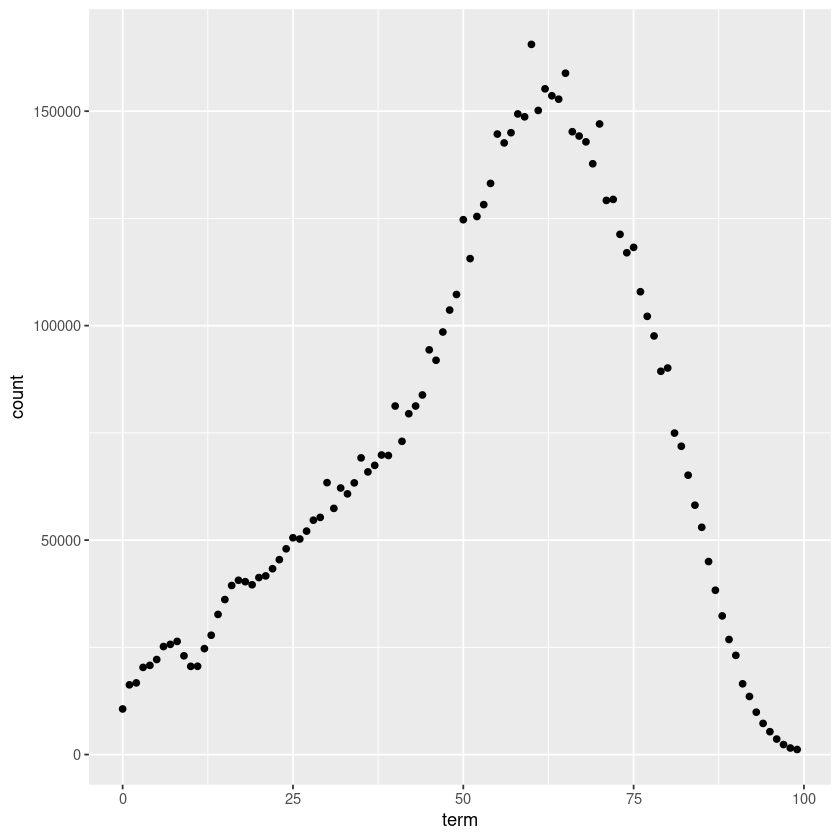

In [8]:
# let's plot it with ggplot2

ggplot(data = patient_ages) +
geom_point(mapping = aes(x=term, y=count))

In [9]:
paxil_ages = fda_query("/drug/event.json") %>%
               fda_filter("patient.drug.openfda.generic_name", "paroxetine") %>%
               fda_count("patient.patientonsetage") %>%
               fda_exec()

Fetching: https://api.fda.gov/drug/event.json?search=patient.drug.openfda.generic_name:paroxetine&count=patient.patientonsetage 


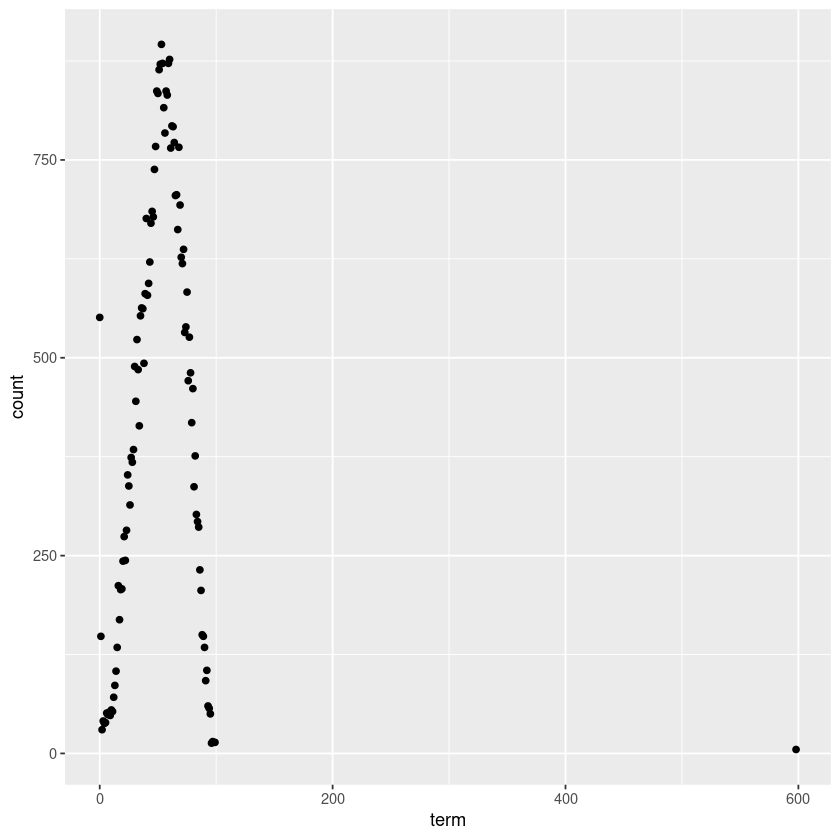

In [10]:
# let's plot it with ggplot2

ggplot(data = paxil_ages) +
geom_point(mapping = aes(x=term, y=count))

In [16]:
library(plyr)

In [17]:
my_query = fda_query("/drug/event.json")

agesm = ldply(c('PREDNISONE', 'Hydroxychloroquine', 'Azathioprine'), function(drug) {

  dfm = my_query %>%
  fda_filter("patient.patientsex","2") %>%
  fda_filter("patient.drug.openfda.generic_name", drug) %>%
  fda_filter("receivedate", "[20040101+TO+20160101]") %>%
  fda_filter("patient.drug.drugindication", "%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22") %>%
  fda_filter("patient.patientonsetage", "[50+TO+60]") %>%
  fda_count("patient.reaction.reactionmeddrapt.exact") %>%
  fda_limit(5)%>%
    fda_exec()
  dfm$drug = drug
  dfm
})

Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:PREDNISONE+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 
Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:Hydroxychloroquine+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 
Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:Azathioprine+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 


In [29]:
head(agesm)

,term,count,drug
,<chr>,<int>,<chr>
1,FATIGUE,44,PREDNISONE
2,PAIN,38,PREDNISONE
3,HEADACHE,37,PREDNISONE
4,SYSTEMIC LUPUS ERYTHEMATOSUS,32,PREDNISONE
5,NAUSEA,31,PREDNISONE
6,PAIN,48,Hydroxychloroquine


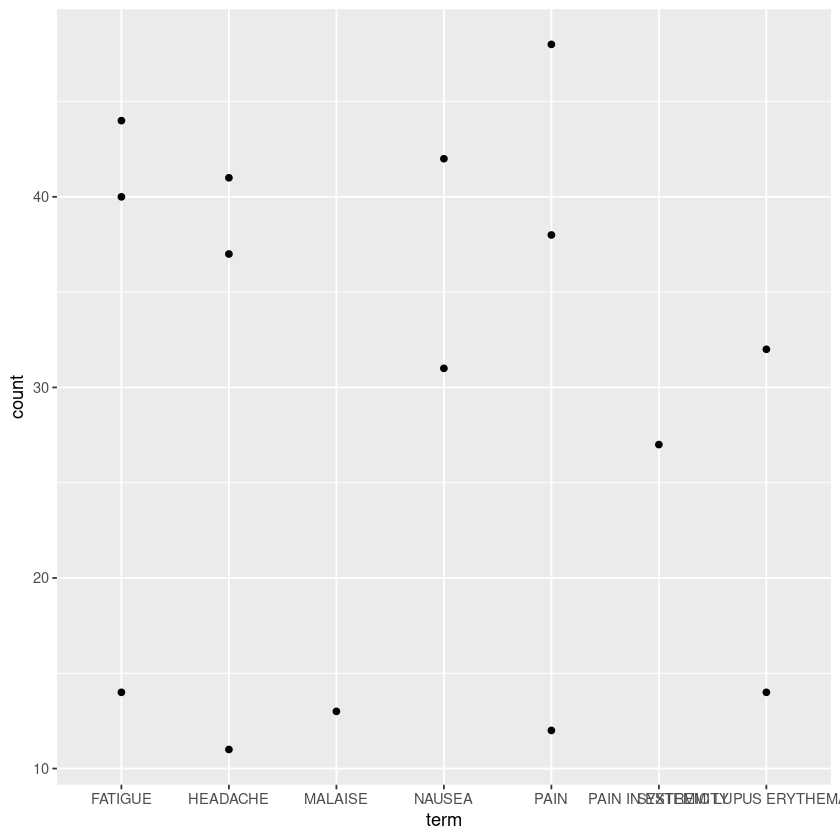

In [38]:
# let's plot it with ggplot2

ggplot(data = agesm) +
geom_point(mapping = aes(x=term, y=count))

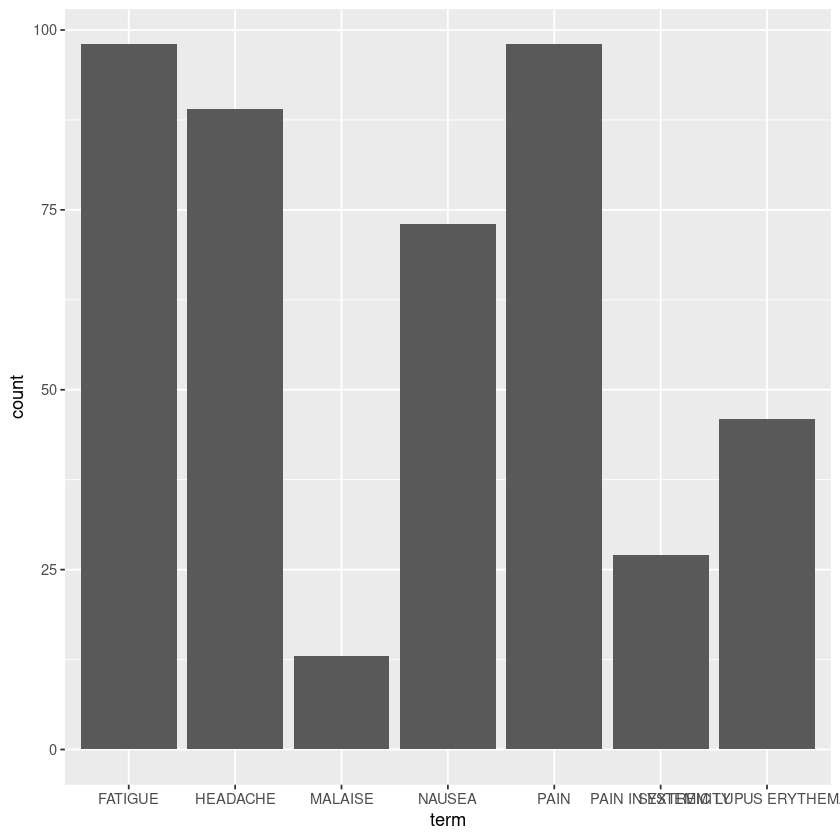

In [49]:
# ggplot(data = agesm) + geom_bar(aes(x=term, y=count, fill = drug))
ggplot(agesm, aes(x=term, y= count)) + geom_bar(stat='identity')


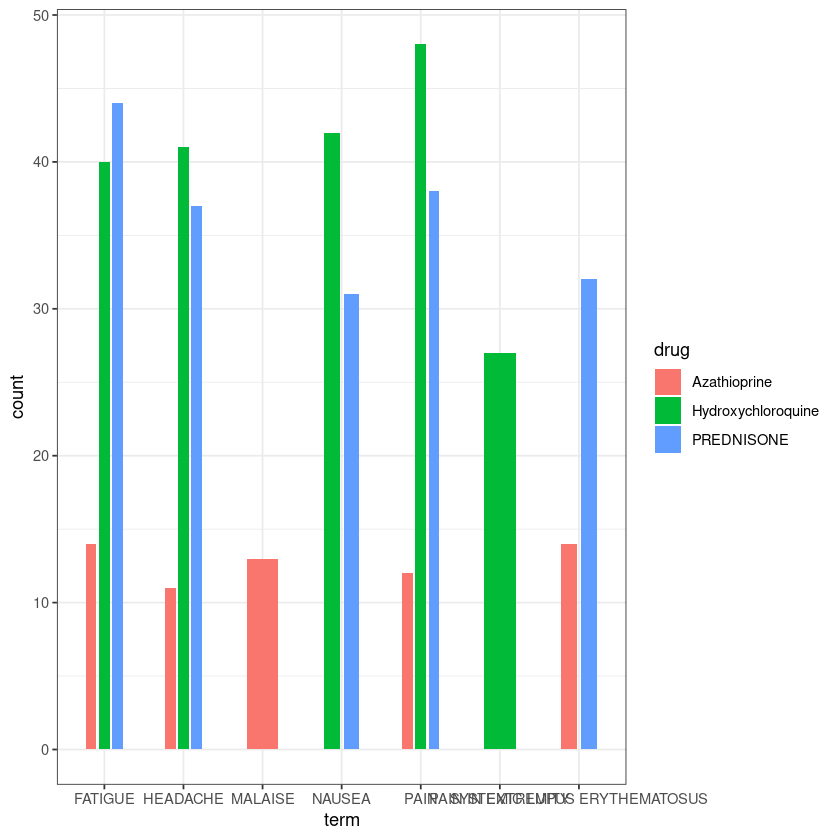

In [50]:
ggplot(data = agesm, aes(x = term, y = count, fill = drug )) +
  geom_bar(stat = "identity",  width = 0.4,
           position=position_dodge(width = 0.5))+
  theme_bw()

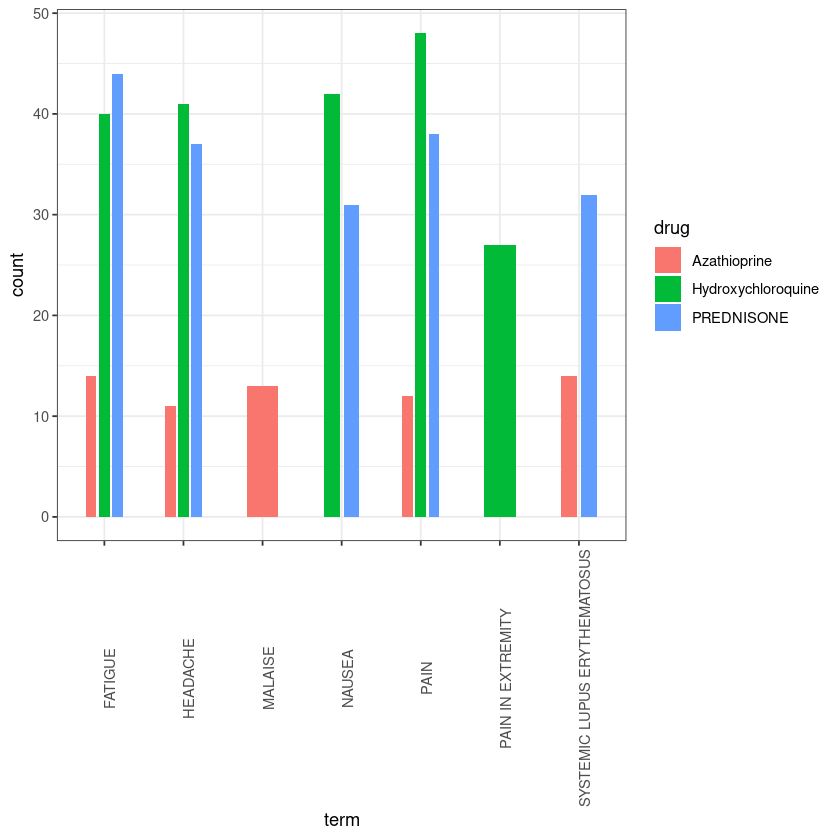

In [54]:
ggplot(data = agesm, aes(x = term, y = count, fill = drug )) +
  geom_bar(stat = "identity",  width = 0.4,
           position=position_dodge(width = 0.5))+
  theme_bw() +
theme(axis.text.x = element_text(angle = 90)) # Rotate axis labels

In [64]:
my_query = fda_query("/drug/event.json")

agesm1 = ldply(c('esomeprazole', 'lansoprazole', 'omeprazole', 'pantoprazole', 'rabeprazole'), function(drug) {

  dfm = my_query %>%
  fda_filter("patient.patientsex","2") %>%
  fda_filter("patient.drug.openfda.generic_name", drug) %>%
  fda_filter("receivedate", "[20040101+TO+20160101]") %>%
  fda_filter("patient.drug.drugindication", "%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22") %>%
  fda_filter("patient.patientonsetage", "[50+TO+60]") %>%
  fda_count("patient.reaction.reactionmeddrapt.exact") %>%
  fda_limit(5)%>%
    fda_exec()
  dfm$drug = drug
  dfm
})

Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:esomeprazole+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 
Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:lansoprazole+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 
Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:omeprazole+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 
Fetching: https://api.fda.g

In [65]:
head(agesm1)

,term,count,drug
,<chr>,<int>,<chr>
1,NAUSEA,12,esomeprazole
2,HEADACHE,10,esomeprazole
3,FATIGUE,9,esomeprazole
4,ARTHRALGIA,8,esomeprazole
5,DRUG INEFFECTIVE,8,esomeprazole
6,C-REACTIVE PROTEIN INCREASED,5,lansoprazole


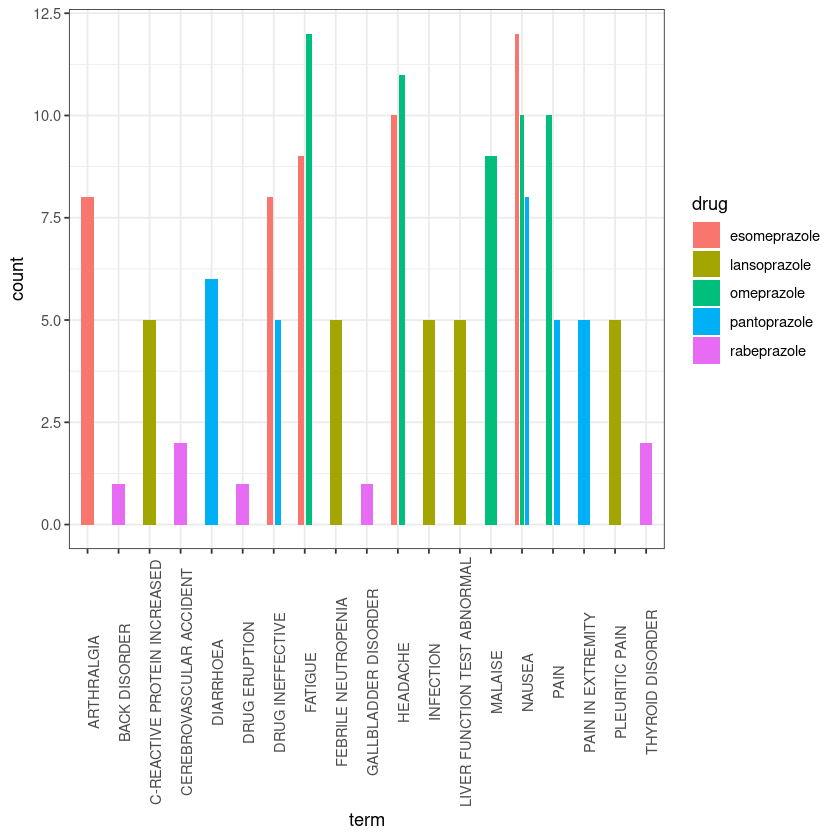

In [63]:
ggplot(data = agesm1, aes(x = term, y = count, fill = drug )) +
  geom_bar(stat = "identity",  width = 0.4,
           position=position_dodge(width = 0.5))+
  theme_bw() +
theme(axis.text.x = element_text(angle = 90)) # Rotate axis labels


## FDAquery

### https://github.com/x78163/FDAquery

This code queries the FDA api based upon user search terms and cross correlates with google trends and twitter posts. Goal is to create a dashboard showing potential clusters of drug side effects. Probably won't work...but the google trends show some seriously interesting cyclical data for certain conditions.....

In [3]:
library("openfda")

patient_ages = fda_query("/drug/event.json") %>%
  fda_count("patient.patientonsetage") %>%
  fda_exec()

Fetching: https://api.fda.gov/drug/event.json?search=&count=patient.patientonsetage 


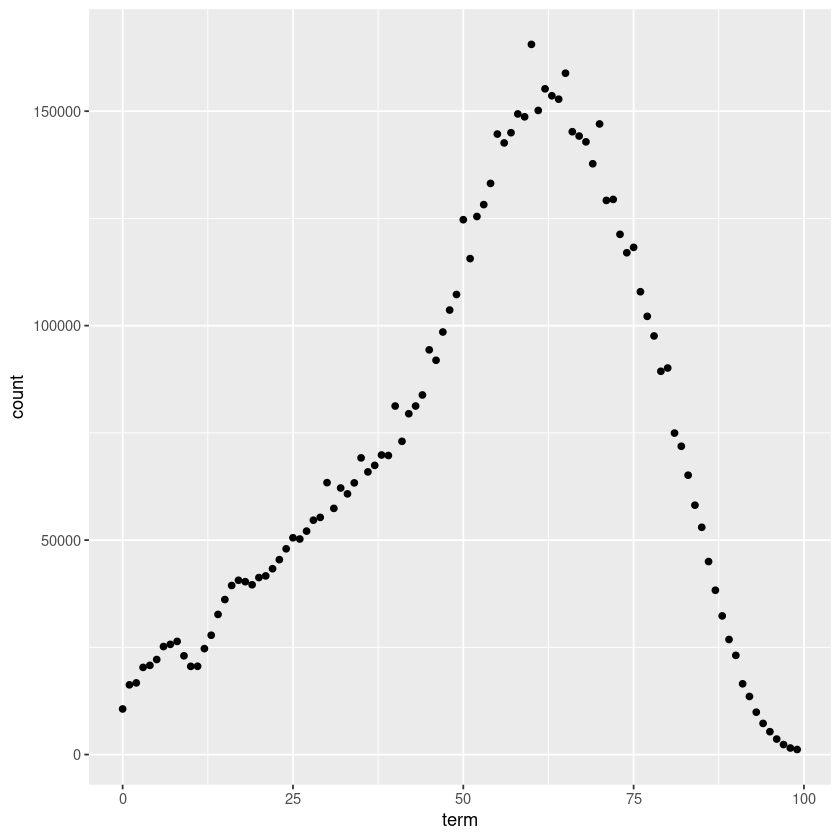

In [4]:
library("ggplot2")
qplot(x=term, y=count, data=patient_ages)

In [5]:
paxil_ages = fda_query("/drug/event.json") %>%
  fda_filter("patient.drug.openfda.generic_name", "paroxetine") %>%
  fda_count("patient.patientonsetage") %>%
  fda_exec()

Fetching: https://api.fda.gov/drug/event.json?search=patient.drug.openfda.generic_name:paroxetine&count=patient.patientonsetage 


In [6]:
age_query = fda_query("/drug/event.json") %>%
  # fda_api_key("MYKEY") %>%
  fda_count("patient.patientonsetage");

Fetching: https://api.fda.gov/drug/event.json?search=patient.drug.openfda.generic_name:paroxetine&count=patient.patientonsetage 
Fetching: https://api.fda.gov/drug/event.json?search=patient.drug.openfda.generic_name:sertraline&count=patient.patientonsetage 


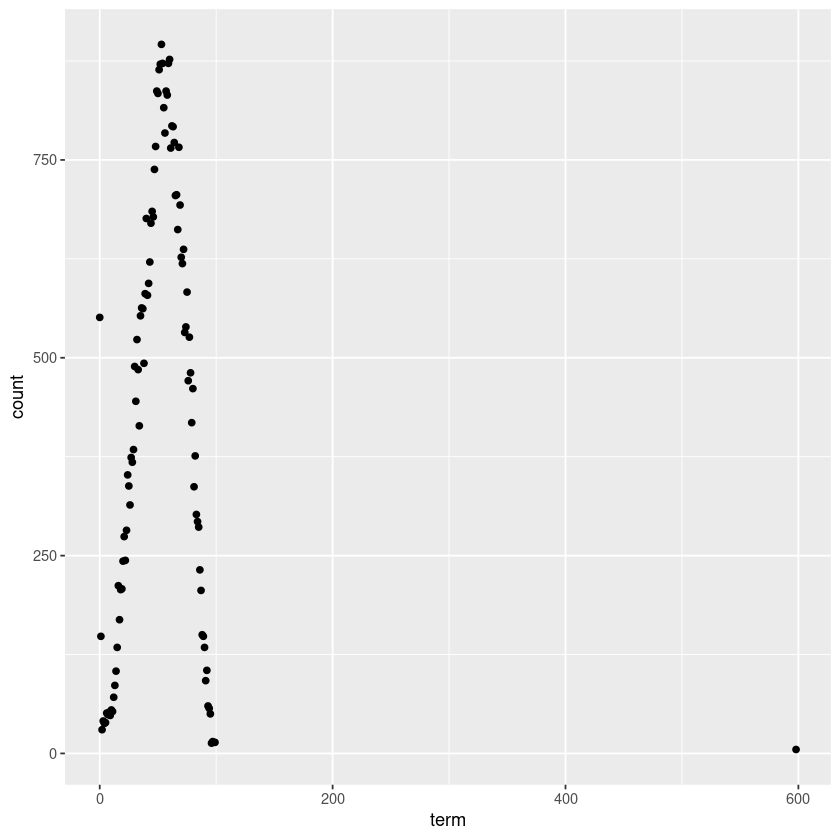

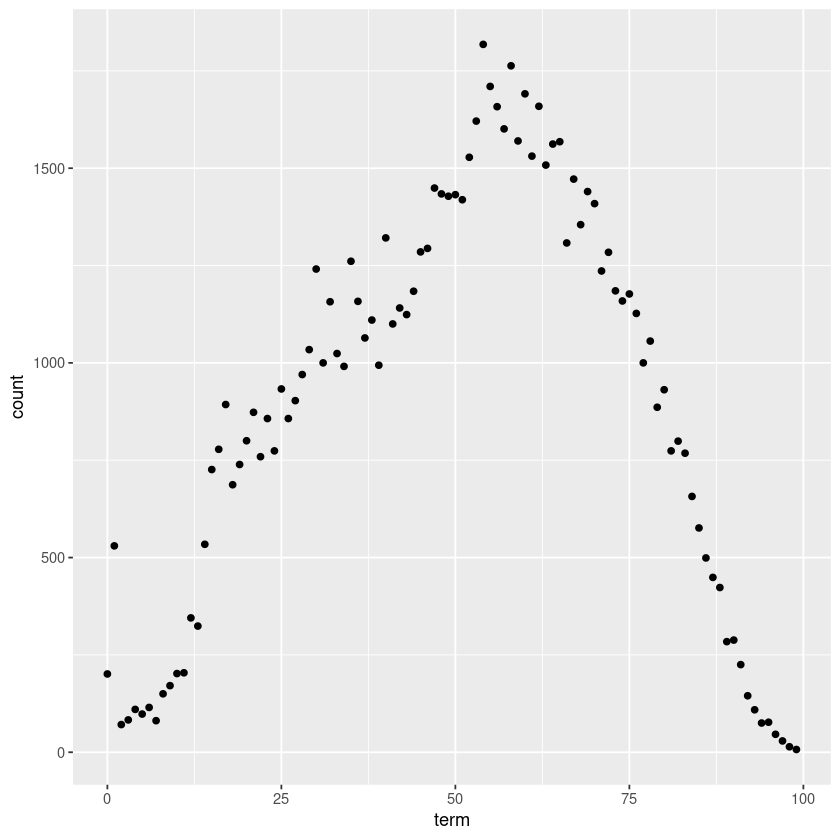

In [7]:
paxil_ages = age_query %>% fda_filter("patient.drug.openfda.generic_name", "paroxetine") %>% fda_exec()
zoloft_ages = age_query %>% fda_filter("patient.drug.openfda.generic_name", "sertraline") %>% fda_exec()
qplot(x=term, y=count, data=paxil_ages)
qplot(x=term, y=count, data=zoloft_ages)

## ACOP-2019-R-for-Drug-Development-Workshop
## OpenFDA API to explore adverse event data
https://github.com/philbowsher/ACOP-2019-R-for-Drug-Development-Workshop/tree/master/statistical_programming_examples/AE_OpenFDA

In [22]:
library("openfda")
library(ggplot2)
library("plyr")

Fetching: https://api.fda.gov/drug/event.json?search=&count=patient.patientonsetage 


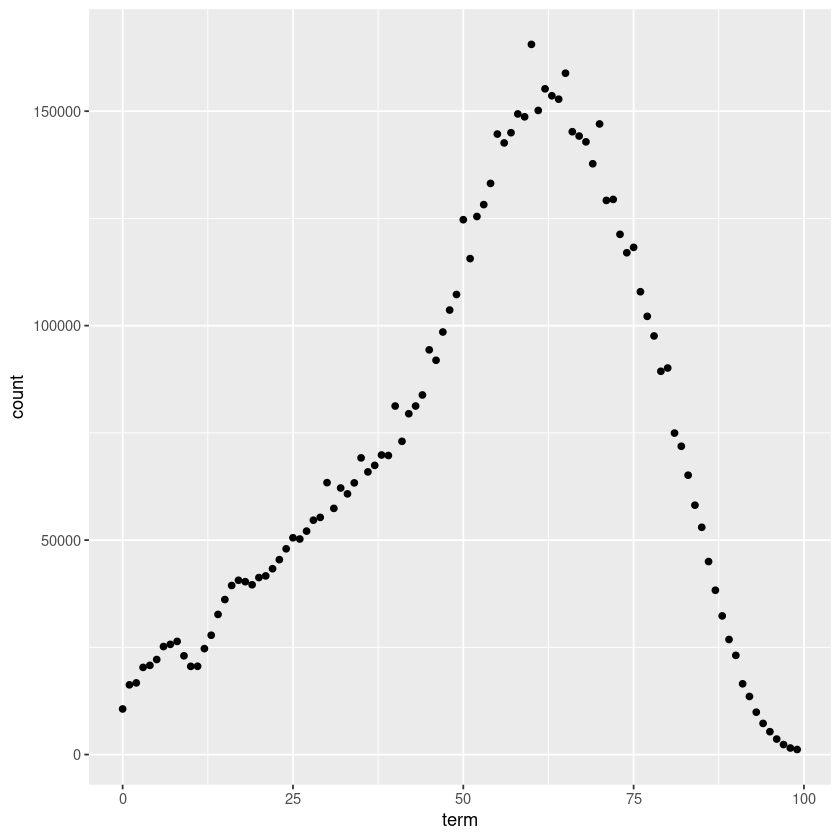

In [23]:
patient_ages = fda_query("/drug/event.json") %>%
               fda_count("patient.patientonsetage") %>%
               fda_exec()
ggplot(data = patient_ages) +
geom_point(mapping = aes(x=term, y=count))

In [24]:
my_query = fda_query("/drug/event.json")

agesm = ldply(c('PREDNISONE', 'Hydroxychloroquine', 'Azathioprine'), function(drug) {

  dfm = my_query %>%
  fda_filter("patient.patientsex","2") %>%
  fda_filter("patient.drug.openfda.generic_name", drug) %>%
  fda_filter("receivedate", "[20040101+TO+20160101]") %>%
  fda_filter("patient.drug.drugindication", "%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22") %>%
  fda_filter("patient.patientonsetage", "[50+TO+60]") %>%
  fda_count("patient.reaction.reactionmeddrapt.exact") %>%
  fda_limit(5)%>%
    fda_exec()
  dfm$drug = drug
  dfm
})

Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:PREDNISONE+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 
Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:Hydroxychloroquine+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 
Fetching: https://api.fda.gov/drug/event.json?search=patient.patientsex:2+AND+patient.drug.openfda.generic_name:Azathioprine+AND+receivedate:[20040101+TO+20160101]+AND+patient.drug.drugindication:%22SYSTEMIC+LUPUS+ERYTHEMATOSUS%22+AND+patient.patientonsetage:[50+TO+60]&limit=5&count=patient.reaction.reactionmeddrapt.exact 


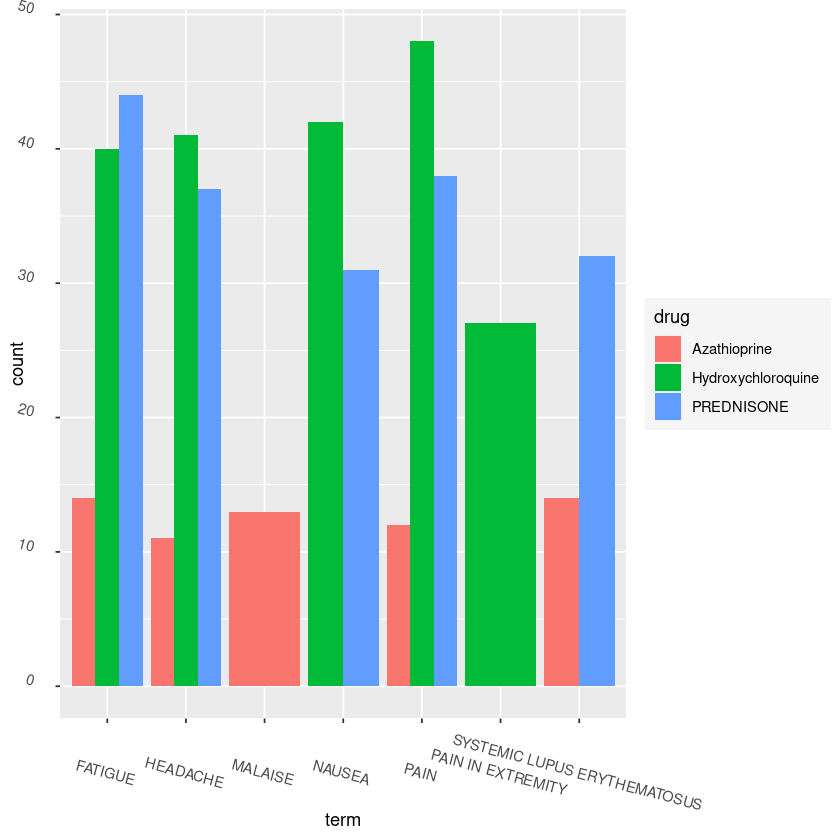

In [25]:
p <- ggplot(data = agesm, aes(x = term, y = count, fill = drug)) + geom_bar(stat="identity", position=position_dodge()) + theme(axis.text = element_text(vjust = 0, angle = -15), legend.background = element_rect(fill = "gray96"))
p

### 02_GGplot2_adverse_events_plots.R

https://github.com/philbowsher/ACOP-2019-R-for-Drug-Development-Workshop/blob/master/statistical_programming_examples/AE_OpenFDA/02_GGplot2_adverse_events_plots/02_GGplot2_adverse_events_plots.R

In [26]:
library(stringr)
library(openfda)
library(dplyr)
library(ggplot2)
library(ggthemes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [27]:
# helper functions to query the openFDA API
get_adverse <- function(gender, brand_name, age) {
  fda_query("/drug/event.json") %>%
    fda_filter("patient.drug.openfda.brand_name", brand_name) %>% 
    fda_filter("patient.patientsex", gender) %>% 
    fda_filter("patient.patientonsetage", age) %>% 
    fda_count("patient.reaction.reactionmeddrapt.exact") %>% 
    fda_limit(10) %>% 
    fda_exec()
}
create_age <- function(min, max){#
  sprintf('[%d+TO+%d]', min, max)
}


In [28]:
# specify drug
drug <- "Tylenol"

In [29]:
# specify age range
age <- create_age(20,65)

In [30]:
# get adverse event data from the openfda API
jnk <- capture.output(male <- get_adverse("1", drug, age))
if (!is.null(male)) {
  male$gender <- 'male'
}
jnk <- capture.output(female <- get_adverse("1", drug, age))
if (!is.null(female)) {
  female$gender <- 'female'
}

In [33]:
# comnbine male and female event data
adverse <- rbind(male, female)
head(adverse)

,term,count,gender
,<chr>,<int>,<chr>
1,FATIGUE,1363,male
2,NAUSEA,1334,male
3,TOXICITY TO VARIOUS AGENTS,1326,male
4,COMPLETED SUICIDE,1309,male
5,PAIN,1249,male
6,PYREXIA,1219,male


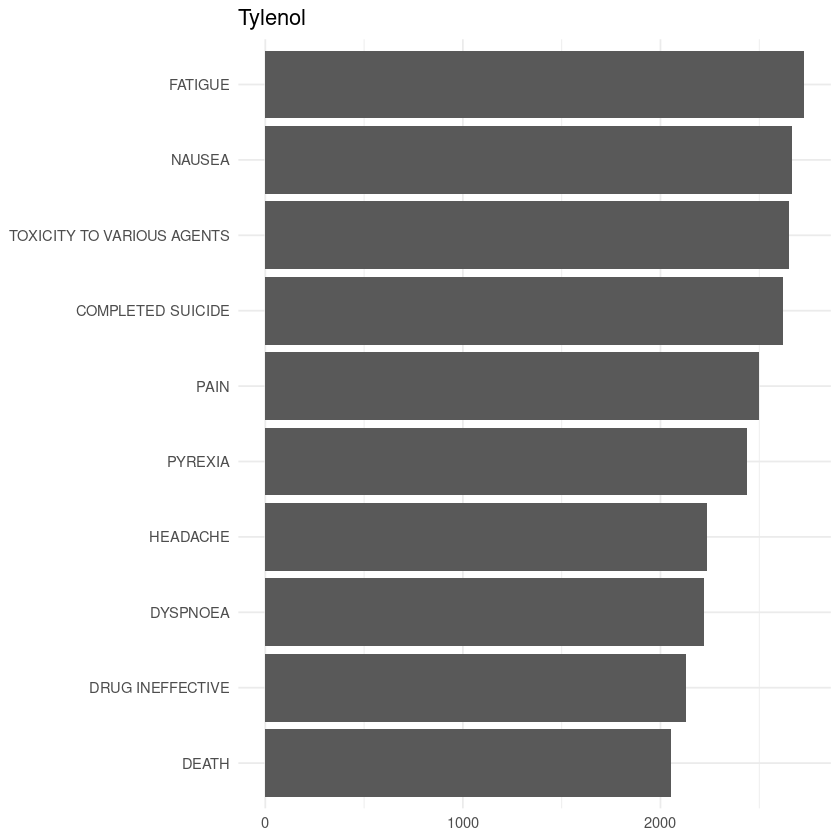

In [34]:
# plot all events  
adverse %>% 
  group_by(term) %>% 
  summarise(count = sum(count)) %>% 
  ggplot() +
  geom_bar(aes(reorder(term,count), count), stat = 'identity') +
  coord_flip() +
  labs(
    title = drug,
    x = NULL,
    y = NULL
  ) +
  theme_minimal()

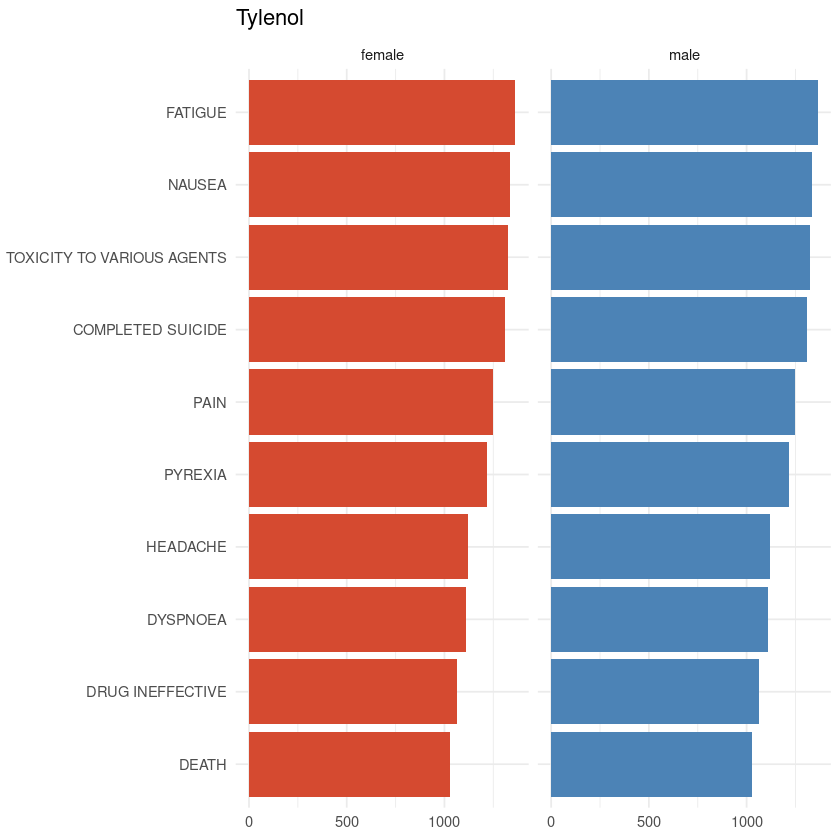

In [35]:
# plot by gender
ggplot(adverse) +
  geom_bar(aes(reorder(term,count), count, fill = gender), stat = 'identity') +
  facet_wrap(~gender)+
  coord_flip() +
  labs(
    title = drug,
    x = NULL,
    y = NULL
  ) +
  theme_minimal() + 
  guides(fill = FALSE) + 
  scale_fill_manual(values = c("#d54a30","#4c83b6"))

### 04_RMD_adverse_events.Rmd
https://github.com/philbowsher/ACOP-2019-R-for-Drug-Development-Workshop/blob/master/statistical_programming_examples/AE_OpenFDA/04_RMD_adverse_events/04_RMD_adverse_events.Rmd